# Машинное обучение и интелектуальные системы
## Лабораторная работа № 2. Основы машинного обучения
### Выполнил: Артамонов Сергей ИДБ-18-09
### Часть 1. Визуализация данных. Градиентный спуск.
#### Задание 1

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn


dataset = pd.read_csv("Davis.csv", index_col=0)
dataset

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
198,M,81,175,NaN,NaN
199,M,90,181,91.0,178.0


 <h3>a) Разделите датасет на 2 выборки (train, test) из 100 человек, с сохранением пропорции полов.</h3>

In [2]:
def proportion(sex):
    male = 0;
    female = 0;
    for s in sex:
        if(s == "M"):
            male += 1;
        else:
            female += 1;
    return male/(male+female)
prop = proportion(dataset["sex"])
print(prop)  

0.44


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset,test_size = 0.5,stratify = dataset['sex'])
print(proportion(train['sex']))
print(proportion(test['sex']))

0.44
0.44


<h3>б) Очистите выборки от выбросов - людей с нереалистичным ростом/весом</h3>
Метод стандартного отклонения

In [4]:
import numpy as np
def delete_anomalies(data):
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    col = data.columns[1:]
    data = data[((data[col] > lower_limit) & (data[col] < upper_limit)).all(1)]
    return data

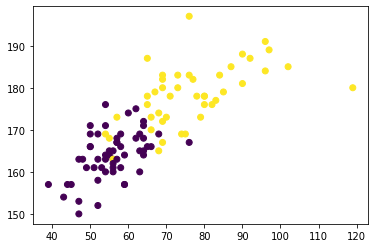

In [5]:

plt.scatter(train["weight"],train['height'], c = pd.get_dummies(train, columns=['sex'])['sex_M'])

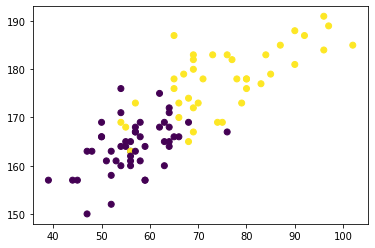

In [6]:
df = train
df = delete_anomalies(df)
train = df
plt.scatter(train["weight"],train['height'], c = pd.get_dummies(train, columns=['sex'])['sex_M'])

In [7]:
train

,sex,weight,height,repwt,repht
13,F,51,161,52.0,158.0
115,F,76,167,77.0,165.0
121,M,78,178,77.0,175.0
80,M,69,183,70.0,183.0
45,M,85,179,82.0,175.0
...,...,...,...,...,...
92,F,56,161,56.0,161.0
52,F,56,165,57.0,163.0
176,M,71,178,68.0,178.0
89,F,57,163,59.0,160.0


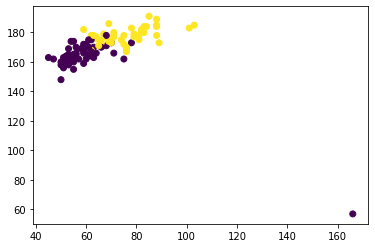

In [8]:
plt.scatter(test["weight"],test['height'], c = pd.get_dummies(test, columns=['sex'])['sex_M'])

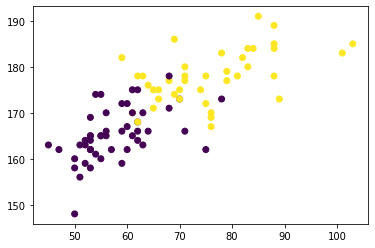

In [9]:
df = test
df = delete_anomalies(df)
test = df
plt.scatter(test["weight"],test['height'], c = pd.get_dummies(test, columns=['sex'])['sex_M'])

In [10]:
test

,sex,weight,height,repwt,repht
194,F,51,156,51.0,158.0
136,F,53,162,53.0,160.0
129,F,68,171,68.0,169.0
173,M,61,170,61.0,170.0
195,F,62,164,61.0,161.0
...,...,...,...,...,...
23,M,65,175,66.0,173.0
9,M,71,178,71.0,175.0
164,F,59,172,58.0,171.0
91,M,70,173,68.0,170.0


Удаляю значения с NaN

In [11]:
train = train.dropna()
train

,sex,weight,height,repwt,repht
13,F,51,161,52.0,158.0
115,F,76,167,77.0,165.0
121,M,78,178,77.0,175.0
80,M,69,183,70.0,183.0
45,M,85,179,82.0,175.0
...,...,...,...,...,...
92,F,56,161,56.0,161.0
52,F,56,165,57.0,163.0
176,M,71,178,68.0,178.0
89,F,57,163,59.0,160.0


In [12]:
test = test.dropna()
test

,sex,weight,height,repwt,repht
194,F,51,156,51.0,158.0
136,F,53,162,53.0,160.0
129,F,68,171,68.0,169.0
173,M,61,170,61.0,170.0
195,F,62,164,61.0,161.0
...,...,...,...,...,...
23,M,65,175,66.0,173.0
9,M,71,178,71.0,175.0
164,F,59,172,58.0,171.0
91,M,70,173,68.0,170.0


<h3>в) Отобразите train-выборку на в виде точек на графике</h3>

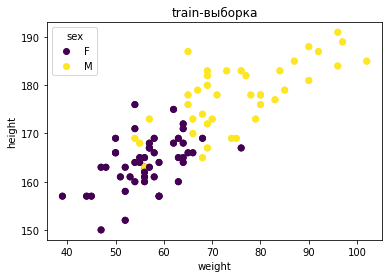

In [13]:
plt.scatter(train["weight"],train['height'], c = train['sex'] == 'M')
s=plt.scatter(train["weight"],train['height'], c = train['sex'] == 'M')
plt.xlabel('weight')
plt.ylabel('height')
plt.title('train-выборка')
text_labels = ['F','M']
plt.legend(s.legend_elements()[0], text_labels,title='sex',loc='upper left')
plt.show()

<h3>г) Постройте гистограммы:</h3>
Роста и веса в целом

<AxesSubplot:>

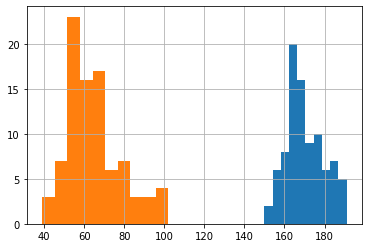

In [14]:
train['height'].hist()
train['weight'].hist()


Роста и веса(только женщины)

<AxesSubplot:>

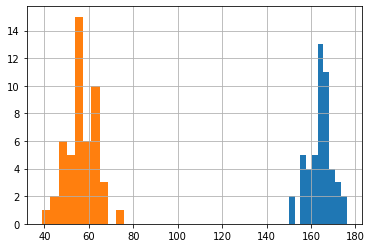

In [15]:
train_female = train.loc[train['sex'] == 'F']
train_female['height'].hist()
train_female['weight'].hist()

Роста и веса(только мужчины)

<AxesSubplot:>

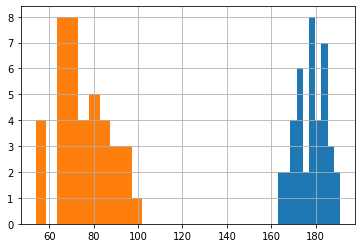

In [16]:
train_male = train.loc[train['sex'] == 'M']
train_male['height'].hist()
train_male['weight'].hist()

Величины (repwt - weight) 
в целом

<AxesSubplot:>

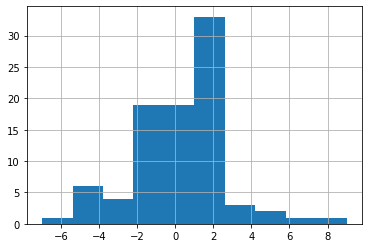

In [17]:
(train['repwt']-train['weight']).hist()

Величины (repwt - weight)  только женщины

<AxesSubplot:>

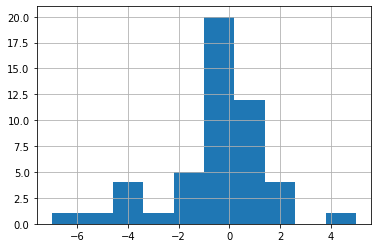

In [18]:
(train_female['repwt'] - train_female['weight']).hist()

Величины (repwt - weight) только мужчины

<AxesSubplot:>

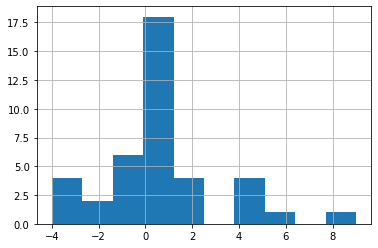

In [19]:
(train_male['repwt'] - train_male['weight']).hist()

Величины (repht - height) в целом

<AxesSubplot:>

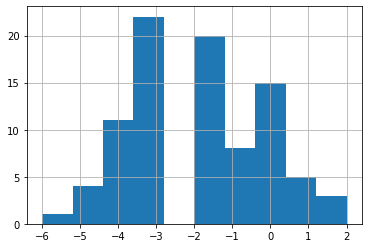

In [20]:
(train['repht']-train['height']).hist()

Величины (repht - height) только женщины

<AxesSubplot:>

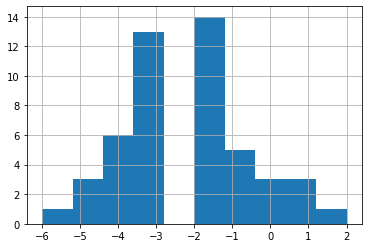

In [21]:
(train_female['repht'] - train_female['height']).hist()

Величины (repht - height) только мужчины

<AxesSubplot:>

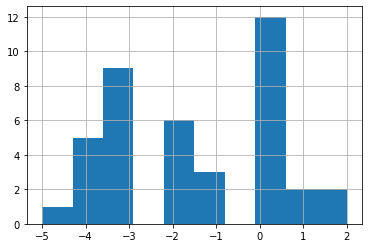

In [22]:
(train_male['repht'] - train_male['height']).hist()

<h3>д) Постройте генератор данных (sex, height, weight) используя следующую модель:</h3>

In [23]:
import scipy
class DataGenerator:
    def __init__(self):
        self.p_woman = None
        self.mean_height = {
            "F":None,
            "M":None
        }
        self.mean_weight = {
            "F": None,
            "M": None
        }
        self.covariance = {
            "F":None,
            "M":None
        }

        
    def fit(self,X_train):
        woman_xtr = X_train.loc[train['sex'] == 'F']
        man_xtr = X_train.loc[train['sex'] == 'M']
        self.p_woman = len(woman_xtr)/len(X_train)
        self.mean_height['M'] = np.mean(man_xtr['height'])
        self.mean_height['F'] = np.mean(woman_xtr['height'])
        self.mean_weight['M'] = np.mean(man_xtr['weight'])
        self.mean_weight['F'] = np.mean(woman_xtr['weight'])
        self.covariance['M'] =  np.cov(man_xtr['height'],man_xtr['weight'])
        self.covariance['F'] = np.cov(woman_xtr['height'],woman_xtr['weight'])
        
    
    def generate_data(self,n):
        result = []
        columns_names = ['sex','weight','height']
        for i in range(n):
            sex = np.random.choice(['F','M'],p=[self.p_woman, 1-self.p_woman])
            height,weight = np.random.multivariate_normal(mean=[self.mean_height[sex],self.mean_weight[sex]],cov = self.covariance[sex])
            height, weight = np.around(height), np.around(weight) 
            result.append([sex,weight,height])

        df = pd.DataFrame(result, columns=columns_names)
        return df
    
    def log_likelihood(self,X):
        man_X = X[(X['sex'] == 'M')][['height', 'weight']]
        woman_X = X[(X['sex'] == 'F')][['height', 'weight']]
        man_log = np.log((1-self.p_woman) * scipy.stats.multivariate_normal.pdf(
            man_X, mean=[self.mean_height['M'], self.mean_weight['M']], cov=self.covariance['M']))
        woman_log = np.log(self.p_woman * scipy.stats.multivariate_normal.pdf(
            woman_X, mean=[self.mean_height['F'], self.mean_weight['F']], cov=self.covariance['F']))
        
        return np.concatenate([man_log, woman_log])

    
    def mean_log_likelihood(self,X):
        return self.log_likelihood(X).mean()      

In [24]:
generator = DataGenerator()
generator.fit(train)
df= generator.generate_data(100)
df

,sex,weight,height
0,M,53.0,171.0
1,F,70.0,174.0
2,M,96.0,179.0
3,F,48.0,168.0
4,F,58.0,165.0
...,...,...,...
95,F,53.0,171.0
96,F,50.0,161.0
97,M,72.0,180.0
98,F,52.0,164.0


In [25]:
generated_log = generator.mean_log_likelihood(df)
train_log = generator.mean_log_likelihood(train)
test_log = generator.mean_log_likelihood(test)
print(f"Generated:{generated_log}")
print(f"train:{train_log}")
print(f"test:{test_log}")

Generated:-7.2596397043507235
train:-7.260979815861823
test:-7.276390914821796


Text(0.5, 1.0, 'Generated data')

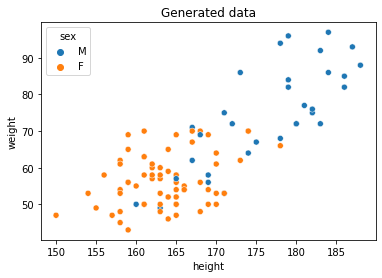

In [26]:
import seaborn as sns
sns.scatterplot(x=df['height'], y=df['weight'], hue=df['sex'] )
plt.title('Generated data')

### Задание 2
а) Обучите градиентным спуском линейную модель вида:

In [27]:
class grad_des_byonesign:
    def __init__(self):
        self.x_min = None
        self.x_max = None
        self.y_min = None
        self.y_max = None
        self.wb_trajectory = {'w':[], 'b':[]} 
    
    def update_w_and_b(self,heights, weights, w, b, alpha):
        dl_dw = 0.0
        dl_db = 0.0
        N = len(heights)

        for i in range(N):
            dl_dw += -2*heights[i]*(weights[i] - (w*heights[i] + b))
            dl_db += -2*(weights[i] - (w*heights[i] + b))


        w = w - (1/float(N))*dl_dw*alpha
        b = b - (1/float(N))*dl_db*alpha

        return w, b

    def train(self,heights, weights, w, b, alpha, stage):
        self.x_min = heights.min()
        self.x_max = heights.max()
        self.y_min = weights.min()
        self.y_max = weights.max()
        heights = (heights - heights.min())/(heights.max() - heights.min())
        weights = (weights - weights.min())/(weights.max() - weights.min())
        for e in range(stage):
            w, b = self.update_w_and_b(heights, weights, w, b, alpha)

            if e % 400 == 0:
                print("stage:", e, "loss: ", self.avg_loss(heights, weights, w, b))
                self.wb_trajectory['w'].append(w)
                self.wb_trajectory['b'].append(b)

        return w, b

    def get_trajectory(self):
        trajx  = {'w':[], 'b':[]}
        trajy  = {'w':[], 'b':[]}
        trajx['w'] = self.wb_trajectory['w'][:-1]
        trajx['b'] = self.wb_trajectory['b'][:-1]
        trajy['w'] = self.wb_trajectory['w'][1:]
        trajy['b'] = self.wb_trajectory['b'][1:]
        trajy['w'] = [trajy['w'][i] - trajx['w'][i] for i in range(len(trajx['w']))]
        trajy['b'] = [trajy['b'][i] - trajx['b'][i] for i in range(len(trajx['b']))]
        return trajx,trajy

    
    def avg_loss(self,heights, weights, w, b):
        N = len(heights)
        total_error = 0.0
        for i in range(N):
            total_error += (weights[i] - (w*heights[i] + b))**2
        return total_error / float(N)
    
    def predict(self,x, w, b):
        x = (x - self.x_min)/(self.x_max - self.x_min)
        return (w*x + b)*(self.y_max - self.y_min) + self.y_min



In [28]:
x = train["height"].values.astype(np.float)
y = train["weight"].values.astype(np.float)
x_norm = (x - x.min())/(x.max() - x.min())
y_norm = (y - y.min())/(y.max() - y.min())

In [29]:
gd = grad_des_byonesign()

w,b = gd.train(x,y , 0.0 , 0.0 , 0.01 ,10000)
print(f'W:{w}\nb:{b}')

stage: 0 loss:  0.20570127286861617
stage: 400 loss:  0.024504842563758622
stage: 800 loss:  0.020084152380114885
stage: 1200 loss:  0.01772726078983958
stage: 1600 loss:  0.016470683632711203
stage: 2000 loss:  0.01580073930505018
stage: 2400 loss:  0.015443558371417067
stage: 2800 loss:  0.015253127295156677
stage: 3200 loss:  0.015151598934062979
stage: 3600 loss:  0.015097469070866282
stage: 4000 loss:  0.01506860972498373
stage: 4400 loss:  0.015053223359757884
stage: 4800 loss:  0.015045020116488745
stage: 5200 loss:  0.015040646555927493
stage: 5600 loss:  0.015038314791361283
stage: 6000 loss:  0.015037071610681373
stage: 6400 loss:  0.015036408808687847
stage: 6800 loss:  0.01503605543569088
stage: 7200 loss:  0.015035867034816717
stage: 7600 loss:  0.015035766588858211
stage: 8000 loss:  0.015035713036078143
stage: 8400 loss:  0.015035684484404238
stage: 8800 loss:  0.015035669262074369
stage: 9200 loss:  0.015035661146286584
stage: 9600 loss:  0.015035656819352936
W:0.772380

<AxesSubplot:>

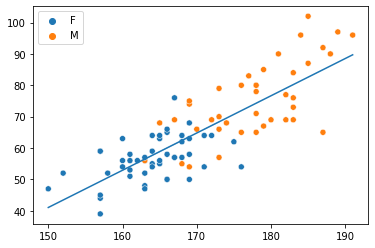

In [30]:
sns.scatterplot(x=x, y=y , hue = train['sex'])
sns.lineplot(x=x, y=gd.predict(x,w,b))

Визуализируйте минимизируемый критерий:

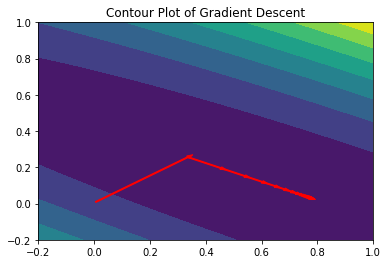

In [32]:
ww,bb = np.mgrid[-0.2:1:100j,-0.2:1:100j]

criterion = np.zeros(shape = (100,100))

for i in range(100):
    for j in range(100):
        criterion[i,j] = gd.avg_loss(x_norm, y_norm, ww[i,j], bb[i,j])
trajx,trajy = gd.get_trajectory()

plt.title("Contour Plot of Gradient Descent")
plt.contourf(ww, bb, criterion)
for i in range(len(trajx['w']) - 1):
    plt.arrow(trajx['w'][i], trajx['b'][i],trajy['w'][i], 
              trajy['b'][i], color='RED',width=0.005)
    